<a href="https://colab.research.google.com/github/vssood/WU_DL/blob/master/Assignments/WU_DL_AS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/assignments/assignment_yourname_class6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), School of Engineering and Applied Science, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

**Module 6 Assignment: Image Processing**

**Student Name: Your Name**

# Assignment Instructions

For this assignment you will use two images: 

* [Dog House](https://github.com/jeffheaton/t81_558_deep_learning/raw/master/photos/hickory_home.jpg)
* [Land Scape](https://github.com/jeffheaton/t81_558_deep_learning/raw/master/photos/landscape.jpg)


Your code should work with any image; however, these are the two that the **submit** function is expecting.  The goal is to convert both images into square-sized.  In this module, we saw how to transform into a square by cropping.  This time we will switch to a square by adding space.  If an image is [landscape orientation](https://en.wikipedia.org/wiki/Page_orientation) you will need to add space at the top and bottom.  Similarly, for portrait (taller than wide), you will add space at the sides.  Make sure that your program centers the image between the space. 

The following diagram illustrates this.

![Image Processing Instructions](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/image-instructions.png "Image Processing Instructions")

To calculate the color to add to the new space, take the average of all RGB values.  Essentially sum all the red values, green, and blue and divide by the total number of pixels.  Notice how the darker landscape picture above has a darker color added to the above/below space?  This effect is due to this averaging.  Make sure you convert your average RGB to an integer, RGB does not have fractional values.

The submit function will check to see if your height and width match my solution.  Your height and width should be square and match my dimensions.  If this is not the case, you likely have a problem with your assignment.  

The submit function also takes three pixels and tests them.  Pixels 1 and 3 are the upper left and lower-right; these are the average color and should match my solution exactly. You might see a difference in pixel 2, which is in the center if you center the image differently than I do.  If you want to match my solution, make sure to round to integer after any divisions. 


# Google CoLab Instructions

If you are using Google CoLab, it will be necessary to mount your GDrive so that you can send your notebook during the submit process. Running the following code will map your GDrive to ```/content/drive```.

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

# Assignment Submit Function

You will submit the ten programming assignments electronically.  The following **submit** function can be used to do this.  My server will perform a basic check of each assignment and let you know if it sees any underlying problems. 

**It is unlikely that should need to modify this function.**

In [ ]:
import base64
import os
import numpy as np
import pandas as pd
import requests
import PIL
import PIL.Image
import io

# This function submits an assignment.  You can submit an assignment as much as you like, only the final
# submission counts.  The paramaters are as follows:
# data - List of pandas dataframes or images.
# key - Your student key that was emailed to you.
# no - The assignment class number, should be 1 through 1.
# source_file - The full path to your Python or IPYNB file.  This must have "_class1" as part of its name.  
# .             The number must match your assignment number.  For example "_class2" for class assignment #2.
def submit(data,key,no,source_file=None):
    if source_file is None and '__file__' not in globals(): raise Exception('Must specify a filename when a Jupyter notebook.')
    if source_file is None: source_file = __file__
    suffix = '_class{}'.format(no)
    if suffix not in source_file: raise Exception('{} must be part of the filename.'.format(suffix))
    with open(source_file, "rb") as image_file:
        encoded_python = base64.b64encode(image_file.read()).decode('ascii')
    ext = os.path.splitext(source_file)[-1].lower()
    if ext not in ['.ipynb','.py']: raise Exception("Source file is {} must be .py or .ipynb".format(ext))
    payload = []
    for item in data:
        if type(item) is PIL.Image.Image:
            buffered = BytesIO()
            item.save(buffered, format="PNG")
            payload.append({'PNG':base64.b64encode(buffered.getvalue()).decode('ascii')})
        elif type(item) is pd.core.frame.DataFrame:
            payload.append({'CSV':base64.b64encode(item.to_csv(index=False).encode('ascii')).decode("ascii")})
    r= requests.post("https://api.heatonresearch.com/assignment-submit",
        headers={'x-api-key':key}, json={ 'payload': payload,'assignment': no, 'ext':ext, 'py':encoded_python})
    if r.status_code==200:
        print("Success: {}".format(r.text))
    else: print("Failure: {}".format(r.text))

# Assignment #6 Sample Code

The following code provides a starting point for this assignment.

[12033280 10873684  9789104] Length : 240 320 Pix size RxC : 76800 Av. pixle : (156, 141, 127)


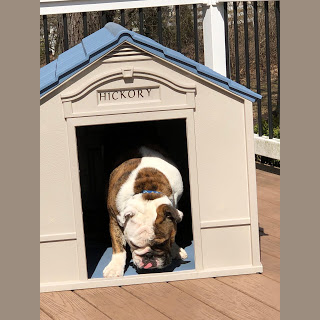


[67327593 73049827 62307231] Length : 1024 768 Pix size RxC : 786432 Av. pixle : (85, 92, 79)
128


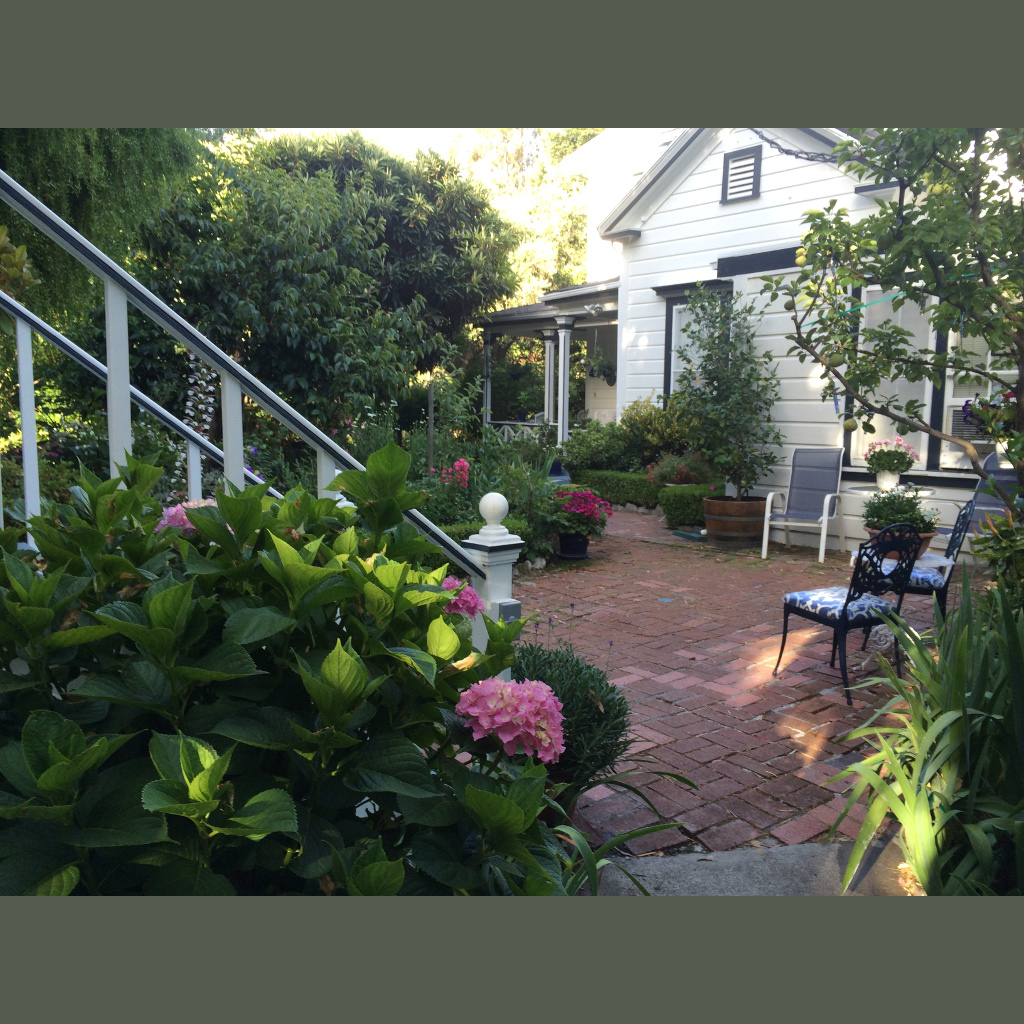

In [5]:
%matplotlib inline

import os
import pandas as pd
import io
import requests
import numpy as np
from scipy.stats import zscore
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np

# This is your student key that I emailed to you at the beginnning of the semester.
key = "Gx5en9cEVvaZnjut6vfLm1HG4ZO4PsI32sgldAXj"  # This is an example key and will not work.

# You must also identify your source file.  (modify for your local setup)
# file='/resources/t81_558_deep_learning/assignment_yourname_class6.ipynb'  # IBM Data Science Workbench
# file='C:\\Users\\jeffh\\projects\\t81_558_deep_learning\\t81_558_class6_intro_python.ipynb'  # Windows
file='/Users/jheaton/projects/t81_558_deep_learning/assignments/assignment_yourname_class6.ipynb'  # Mac/Linux

def fill_square_image(img):
    # ************* Add your solution here*********
    # You should not need to modify the other code.  
    # The return statement should be replaced with your own.
    cols, rows = img.size
    training_data = []
    img_data = np.asarray(img)
    im_pix_val = np.sum(np.sum(img_data, axis=0), axis= 0)

    pixle_size = cols * rows 
    av_pix = im_pix_val // pixle_size
    av_pix = tuple(av_pix)
    print(im_pix_val, "Length :", cols, rows,  "Pix size RxC :", pixle_size, "Av. pixle :", av_pix)    

    if rows > cols:
        pad = (rows-cols)//2 
        result = Image.new(img.mode, (rows, rows), color= av_pix)
        result.paste(img, (pad, 0))
        img = result
    else:
        pad = (cols - rows)//2
        result =  Image.new(img.mode, (cols, cols), color = av_pix)  
        print(pad)
        result.paste(img, (0, pad))   
        img = result     
    return img

# Handle first image
url = "https://github.com/jeffheaton/t81_558_deep_learning/raw/master/photos/hickory_home.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()
submit_img1 = fill_square_image(img)
display(submit_img1)

print()

# Handle second image
url = "https://github.com/jeffheaton/t81_558_deep_learning/raw/master/photos/landscape.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()
submit_img2 = fill_square_image(img)
display(submit_img2)

#submit(source_file=file,data=[submit_img1,submit_img2],key=key,no=6)

In [ ]:
def make_square(img, opt = 'crop'):
    cols, rows = img.size
    training_data = []
    img_data = np.asarray(img)
    im_pix_val = np.sum(np.sum(img_data, axis=0), axis= 0)

    pixle_size = cols * rows 
    av_pix = im_pix_val // pixle_size
    av_pix = tuple(av_pix)
    print(im_pix_val, "Length :", cols, rows,  "Pix size RxC :", pixle_size, "Av. pixle :", av_pix)
    #print(training_data, "length ", len(training_data))
    if opt == 'crop':
        if rows > cols:
            pad = (rows-cols)/2 
            img = img.crop((pad, 0, cols, cols) )
            print(f"Rows higher : {pad, 0, cols, cols, rows} ")
        else:
            pad = (cols - rows)/2 
            img = img.crop((0, pad, rows, rows))
            print(f"Cols higher  {0, pad, rows, rows, cols}"   )
    else:
        print("paste")
        if rows > cols:
            pad = (rows-cols)//2 
            result = Image.new(img.mode, (cols, cols), color= av_pix)
            result.paste(img, (pad, 0))
            img = result
        else:
            pad = (cols - rows)//2
            result =  Image.new(img.mode, (cols, cols), color = av_pix)  
            print(pad)
            result.paste(img, (0, pad))   
            img = result          
    return img
